In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS
import string
import spacy
plt.style.use('fivethirtyeight')
colors=['#097335','#030f4e','#f3dfb4','#bb840d','#cbf3e9']
sns.set_palette(sns.color_palette(colors))

In [2]:
df = pd.read_csv("../input/mental-health-social-media/Mental-Health-Twitter.csv")
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
df.shape


(20000, 11)

In [4]:
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [5]:
df.duplicated().sum()

0

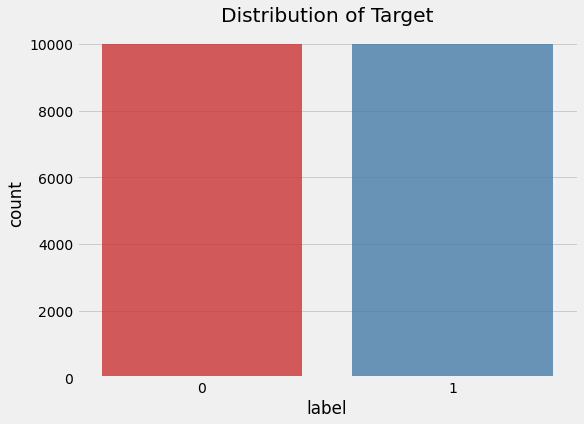

In [5]:
plt.figure(figsize = (8,6))
sns.countplot(x = df['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Target')
plt.show()

<Figure size 1440x576 with 0 Axes>

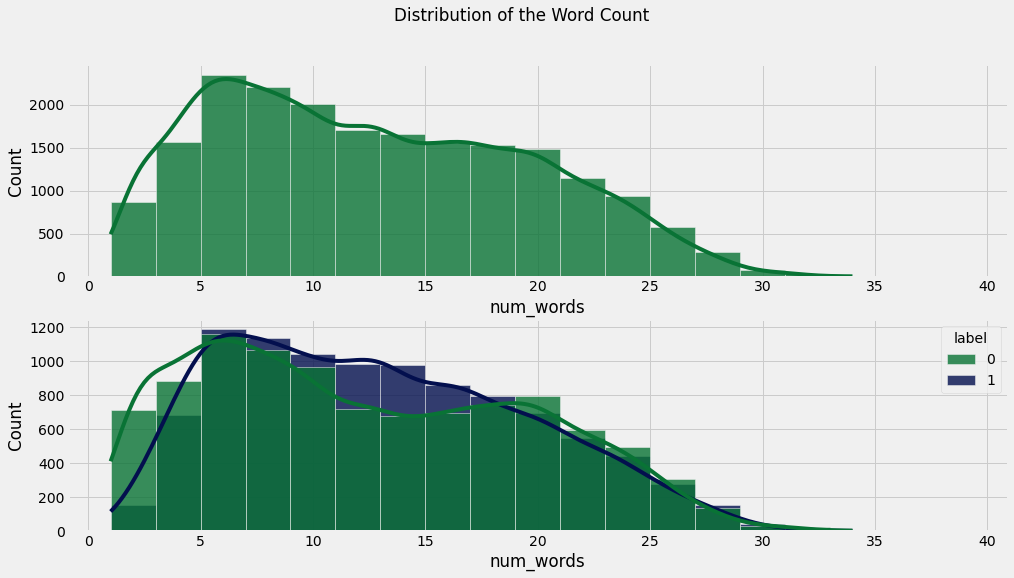

In [18]:
plt.figure(figsize = (20,8))
fig,ax=plt.subplots(2,1,figsize=(15,8))
df['num_words'] = df['post_text'].apply(lambda x: len(x.split()))

sns.histplot(data=df,x='num_words', bins = range(1, 40, 2), alpha = 0.8,kde=True,ax=ax[0])
sns.histplot(data=df,x='num_words', bins = range(1, 40, 2), alpha = 0.8,kde=True,ax=ax[1],hue='label')
plt.suptitle('Distribution of the Word Count')
plt.show()

In [19]:
day=[]
month=[]
date=[]
for i in df['post_created']:
    temp=i.split()
    day.append(temp[0])
    month.append(temp[1])
    date.append(temp[2])
df['day']=day
df['month']=month
df['date']=date

In [5]:
final_df = df[['post_text','label']]
final_df.head()

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [6]:
final_df.isnull().sum()

post_text    0
label        0
dtype: int64

In [7]:
df.duplicated().sum()

460

In [8]:
final_df=final_df.drop_duplicates(keep='first')

In [9]:
final_df.shape

(19488, 2)

In [3]:
import emoji
def emoji_word(text):
    return emoji.demojize(text, delimiters=(" ", ""))

In [11]:
final_df['emoji_text'] = final_df['post_text'].apply(emoji_word)


In [4]:
nlp = spacy.load("en_core_web_sm")


In [16]:
def transform_text(text):
    text = text.lower()
    text = emoji_word(text)
    text = text.split("_")
    text = " ".join(text)
    text = [word.text for word in nlp(text)]
    y=[]
    for i in text:
        if i.isalnum() and (i not in STOP_WORDS) and (i not in string.punctuation):
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        for j in nlp(i):
            y.append(j.lemma_)
    return " ".join(y)

In [17]:
final_df['transformed_text']=final_df['post_text'].apply(transform_text)


In [2]:
final_df=pd.read_csv("../input/preprocessed-data/final_df_depression.csv")
final_df.drop(['Unnamed: 0','post_text','emoji_text'],inplace=True,axis=1)

In [3]:
import re
def remove_words(text):
    pattern=r'rt|[0-9]'
    text_new = re.sub(pattern,"",str(text))
    return text_new

In [4]:
final_df['t_text']=final_df['transformed_text'].apply(remove_words)

In [5]:
final_df.dropna(axis=0,how='any',inplace=True)
final_df.shape

(19331, 3)

In [6]:
final_df.drop(['transformed_text'],axis=1,inplace=True)
final_df.rename(columns={'t_text':'transformed_text'},inplace=True)

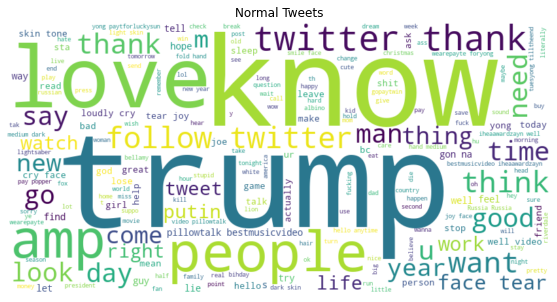

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(final_df[final_df['label']==0]['transformed_text']))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Normal Tweets")
plt.show()

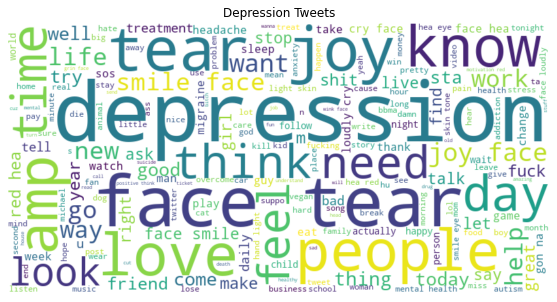

In [8]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(final_df[final_df['label']==1]['transformed_text']))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Depression Tweets")
plt.show()

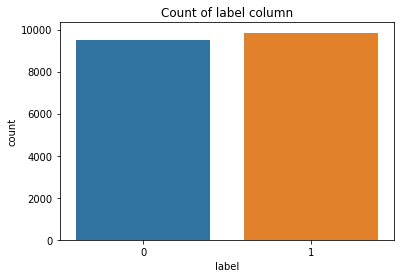

In [9]:
sns.countplot(data=final_df,x='label')
plt.title("Count of label column")
plt.show()

In [8]:
final_df

,label,transformed_text
0,1,year diagnose anxiety depression today take m...
1,1,sunday need break plan spend little time possi...
2,1,awake tired need sleep brain idea
3,1,retro bear perfect gift great beginner stitch...
4,1,hard pack list make life easy reinforce need m...
...,...,...
19483,0,day sunshine like night
19484,0,boren law charge ponder trouble delegate do...
19485,0,flow cha thoroughly oversold piece program doc...
19486,0,ship safe harbor mean stay


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [7]:
X=final_df['transformed_text']
y=final_df['label']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y,shuffle=True)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
tfv.fit(X_train)
X_train =  tfv.transform(X_train).toarray() 
X_test=tfv.transform(X_test).toarray()

In [22]:
# import pickle
# with open('tfidfvec.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump(tfv, file)

In [13]:
# ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
#             ngram_range=(1, 3), stop_words = 'english',max_features=15000)

# # Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
# ctv.fit(final_df['transformed_text'])
# X =  ctv.transform(final_df['transformed_text']).toarray() 

In [9]:
X.shape

(19331, 8464)

In [10]:
y = final_df['label'].values

In [57]:
#define Keras Tokenizer
tok = Tokenizer()
tok.fit_on_texts(X_train)

#return sequences
sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)

#print size of the vocabulary
print(f'Train vocabulary size: {len(tok.word_index)}')

Train vocabulary size: 13553


In [58]:
#maximum sequence length (512 to prevent memory issues and speed up computation)
MAX_LEN = 50

#padded sequences
X_train_seq = sequence.pad_sequences(sequences,maxlen=MAX_LEN)
X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_LEN)

In [63]:
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding
import tensorflow as tf
import keras
model = Sequential([
    Input(name='inputs',shape=[MAX_LEN]),
    Embedding(len(tok.word_index), 128),
    Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(32)),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

#model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 50, 128)           1734784   
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 50, 256)           263168    
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 50, 128)           164352    
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 64)                41216     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)               

In [64]:
from keras.callbacks import EarlyStopping
history = model.fit(X_train_seq, y_train, epochs=15,validation_split = 0.2, batch_size = 32, callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, verbose=False,restore_best_weights=True)])

Epoch 1/15
363/363 [==============================] - 17s 29ms/step - loss: 0.6932 - accuracy: 0.5076 - val_loss: 0.6930 - val_accuracy: 0.5214
Epoch 2/15
363/363 [==============================] - 9s 26ms/step - loss: 0.6921 - accuracy: 0.5118 - val_loss: 0.6736 - val_accuracy: 0.6162
Epoch 3/15
363/363 [==============================] - 10s 26ms/step - loss: 0.5755 - accuracy: 0.7072 - val_loss: 0.5048 - val_accuracy: 0.7490
Epoch 4/15
363/363 [==============================] - 9s 25ms/step - loss: 0.4099 - accuracy: 0.8328 - val_loss: 0.4659 - val_accuracy: 0.7662
Epoch 5/15
363/363 [==============================] - 9s 25ms/step - loss: 0.3097 - accuracy: 0.8796 - val_loss: 0.4533 - val_accuracy: 0.7752
Epoch 6/15
363/363 [==============================] - 10s 27ms/step - loss: 0.2456 - accuracy: 0.9077 - val_loss: 0.5138 - val_accuracy: 0.7807
Epoch 7/15
363/363 [==============================] - 9s 25ms/step - loss: 0.2036 - accuracy: 0.9265 - val_loss: 0.5987 - val_accuracy: 0.7

In [61]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

152/152 [==============================] - 2s 11ms/step - loss: 0.5803 - accuracy: 0.7705
Test Loss: 0.5803123712539673
Test Accuracy: 0.7705358862876892


In [10]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2371
           1       0.80      0.71      0.75      2462

    accuracy                           0.76      4833
   macro avg       0.76      0.76      0.76      4833
weighted avg       0.76      0.76      0.76      4833



<AxesSubplot:>

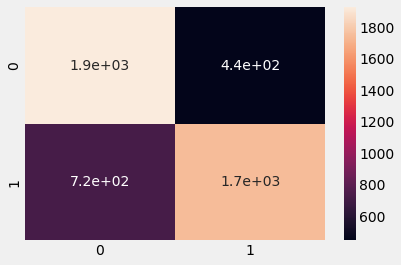

In [11]:
from sklearn.metrics import classification_report
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test,y_pred_gnb))
sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True)

               precision    recall  f1-score   support

Not Depressed       0.81      0.69      0.75      2371
    Depressed       0.74      0.85      0.79      2462

     accuracy                           0.77      4833
    macro avg       0.78      0.77      0.77      4833
 weighted avg       0.78      0.77      0.77      4833



<AxesSubplot:>

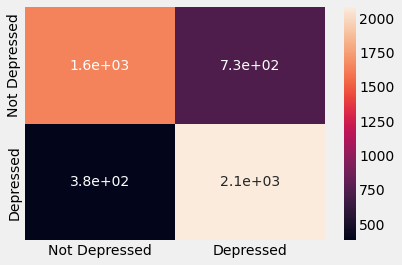

In [12]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(classification_report(y_test,y_pred_mnb,target_names=['Not Depressed','Depressed']))
sns.heatmap(confusion_matrix(y_test,y_pred_mnb),annot=True,xticklabels=['Not Depressed','Depressed'],yticklabels=['Not Depressed','Depressed'])

                precision    recall  f1-score   support

Not Depression       0.77      0.78      0.78      2371
    Depression       0.79      0.78      0.78      2462

      accuracy                           0.78      4833
     macro avg       0.78      0.78      0.78      4833
  weighted avg       0.78      0.78      0.78      4833



<AxesSubplot:>

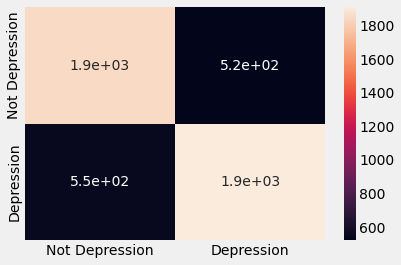

In [13]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(classification_report(y_test,y_pred_bnb,target_names=['Not Depression','Depression']))
sns.heatmap(confusion_matrix(y_test,y_pred_bnb),annot=True,xticklabels=['Not Depression','Depression'],yticklabels=['Not Depression','Depression'])

                precision    recall  f1-score   support

Not Depression       0.74      0.76      0.75      2371
    Depression       0.76      0.75      0.75      2462

      accuracy                           0.75      4833
     macro avg       0.75      0.75      0.75      4833
  weighted avg       0.75      0.75      0.75      4833



<AxesSubplot:>

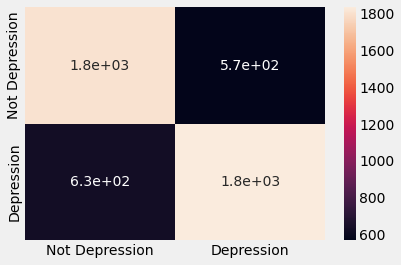

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred,target_names=['Not Depression','Depression']))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Not Depression','Depression'],yticklabels=['Not Depression','Depression'])

                precision    recall  f1-score   support

Not Depression       0.91      0.27      0.42      2371
    Depression       0.58      0.98      0.73      2462

      accuracy                           0.63      4833
     macro avg       0.75      0.62      0.58      4833
  weighted avg       0.75      0.63      0.58      4833



<AxesSubplot:>

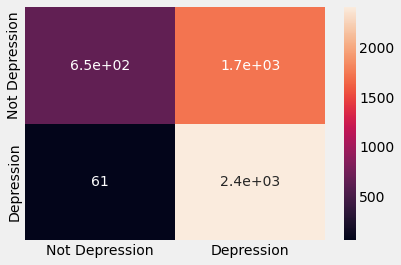

In [15]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
print(classification_report(y_test,y_pred,target_names=['Not Depression','Depression']))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Not Depression','Depression'],yticklabels=['Not Depression','Depression'])

                precision    recall  f1-score   support

Not Depression       0.91      0.28      0.43      2371
    Depression       0.58      0.97      0.73      2462

      accuracy                           0.63      4833
     macro avg       0.75      0.63      0.58      4833
  weighted avg       0.74      0.63      0.58      4833



<AxesSubplot:>

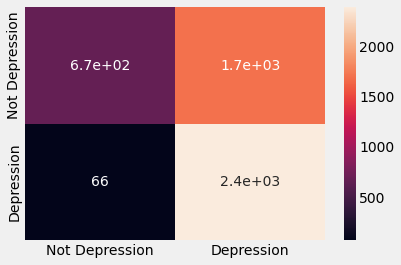

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
print(classification_report(y_test,y_pred,target_names=['Not Depression','Depression']))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Not Depression','Depression'],yticklabels=['Not Depression','Depression'])

                precision    recall  f1-score   support

Not Depression       0.79      0.75      0.77      2371
    Depression       0.77      0.80      0.79      2462

      accuracy                           0.78      4833
     macro avg       0.78      0.78      0.78      4833
  weighted avg       0.78      0.78      0.78      4833



<AxesSubplot:>

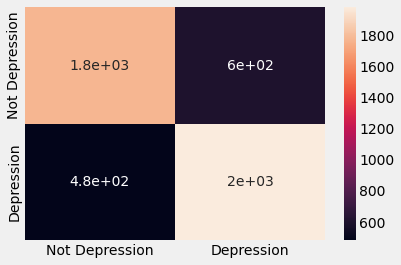

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

estimator = []
estimator.append(('LR', 
                  AdaBoostClassifier(n_estimators=50, random_state=2)))
estimator.append(('GB', 
                  GradientBoostingClassifier(n_estimators=50,random_state=2)))
estimator.append(('GNB',GaussianNB()))
estimator.append(('BNB',BernoulliNB()))

vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
print(classification_report(y_test,y_pred,target_names=['Not Depression','Depression']))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Not Depression','Depression'],yticklabels=['Not Depression','Depression'])

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2371
           1       0.77      0.80      0.79      2462

    accuracy                           0.78      4833
   macro avg       0.78      0.78      0.78      4833
weighted avg       0.78      0.78      0.78      4833



In [25]:
confusion_matrix(y_test,y_pred)

array([[1771,  600],
       [ 482, 1980]])

In [28]:
import pickle
with open('voting.pkl', 'wb') as file:
    pickle.dump(vot_hard, file)

In [27]:
confusion_matrix(y_test,y_pred)

array([[ 651, 1720],
       [  61, 2401]])